<a href="https://colab.research.google.com/github/gauriagarwal18/Telecom-Churn-Analysis/blob/master/Telecom_Churn_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

####In this project I have Explored and analyzed the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. 
####Also I have built a model to check whether a customer with given qualities will churn or not.

##We are using the following libraries for analysis:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seaborn: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Loading CSV file from google drive in colab enviroment
We will first load our csv file in which data is stored to the colab enviroment in data frame format so that we can make the copy of the original data and perform the required cleaning and analysis on that data without changing the original one.



In [150]:
#Download datasets Hepatitis automobile from UCI repository
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/telecom_churn_analysis/TelecomChurn.csv"

telecom_original=pd.read_csv(path)
telecom= telecom_original.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PROJECT DESCRIPTION:

The data set is a combination of different types of variables among which some are categorical variables some are discrete variables and some are continuous variables.

To make required analysis from the given raw data we have to perform following steps:

**step1 [Understanding the data deeply]**: Read the data thoroughly and understand the connections between different attributes

**step2 [Data Cleaning]**: This data is raw data and it may contains lot of noise so we  have to remove it for proper analysis with minimum or no error.

**step3 [Analysing and Concluding]**: After data cleaing, data is ready for further analysis, so we make required analysis and visulisation for various attributes of data and for required combinations of attributes of data.

**step4 [Model Builing]**: After required analysis I will make a model to find out whether a customer will be churn or not.


##Understanding the data

In [151]:
telecom.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [152]:
telecom.describe(include="all")

State  Account length    Area code International plan Voice mail plan  \
count   3333     3333.000000  3333.000000               3333            3333   
unique    51             NaN          NaN                  2               2   
top       WV             NaN          NaN                 No              No   
freq     106             NaN          NaN               3010            2411   
mean     NaN      101.064806   437.182418                NaN             NaN   
std      NaN       39.822106    42.371290                NaN             NaN   
min      NaN        1.000000   408.000000                NaN             NaN   
25%      NaN       74.000000   408.000000                NaN             NaN   
50%      NaN      101.000000   415.000000                NaN             NaN   
75%      NaN      127.000000   510.000000                NaN             NaN   
max      NaN      243.000000   510.000000                NaN             NaN   

        Number vmail messages  Total day minutes  Total day calls  \
count             3333.000000        3333.000000      3333.000000   
unique                    NaN                NaN              NaN   
top                       NaN                NaN              NaN   
freq                      NaN                NaN              NaN   
mean                 8.099010         179.775098       100.435644   
std                 13.688365          54.467389        20.069084   
min                  0.000000           0.000000         0.000000   
25%                  0.000000         143.700000        87.000000   
50%                  0.000000         179.400000       101.000000   
75%                 20.000000         216.400000       114.000000   
max                 51.000000         350.800000       165.000000   

        Total day charge  Total eve minutes  Total eve calls  \
count        3333.000000        3333.000000      3333.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean           30.562307         200.980348       100.114311   
std             9.259435          50.713844        19.922625   
min             0.000000           0.000000         0.000000   
25%            24.430000         166.600000        87.000000   
50%            30.500000         201.400000       100.000000   
75%            36.790000         235.300000       114.000000   
max            59.640000         363.700000       170.000000   

        Total eve charge  Total night minutes  Total night calls  \
count        3333.000000          3333.000000        3333.000000   
unique               NaN                  NaN                NaN   
top                  NaN                  NaN                NaN   
freq                 NaN                  NaN                NaN   
mean           17.083540           200.872037         100.107711   
std             4.310668            50.573847          19.568609   
min             0.000000            23.200000          33.000000   
25%            14.160000           167.000000          87.000000   
50%            17.120000           201.200000         100.000000   
75%            20.000000           235.300000         113.000000   
max            30.910000           395.000000         175.000000   

        Total night charge  Total intl minutes  Total intl calls  \
count          3333.000000         3333.000000       3333.000000   
unique                 NaN                 NaN               NaN   
top                    NaN                 NaN               NaN   
freq                   NaN                 NaN               NaN   
mean              9.039325           10.237294          4.479448   
std               2.275873            2.791840          2.461214   
min               1.040000            0.000000          0.000000   
25%               7.520000            8.500000          3.000000   
50%               9

In [153]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Conclusions:** 
- Data have initially 20 columns, among which the churn columns that is our dependent column is of boolean data type, 8 columns each for float and int type,  and 3 column are of string or object type.
- The comapny have some plans like international plan and voice mail plans.
- We have given information like account length and the state of the user for which we can do analysis.
- also we note that there is no null value 

##Data cleaning:
**step1:**Removed null values: althoough there are no null values at present but it is possible that when the data get's updated it may consists some null values.

**step2:**Removed outliers so that some rare records do not affect our result.

**step3:**Then I have removed multicollinearity from the data.

**step4:**Then I performed feature engineering and added some required columns.

In [154]:
def print_null_percent(df):
  null_percent=pd.Series()
  for col in df.columns:
    null_percent[col]=((df.shape[0]-df[col].count())/(df.shape[0]))*100
  print("columns with null values\n",null_percent[null_percent!=0])



In [155]:
def remove_outliers(df):

  continuous_col=df.describe().columns
  df.boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df.boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

In [156]:
def normalization(df,col_list):

  for c1 in col_list:
    try:
      mx=df.max()[c1]
      mn=df.min()[c1]
      df[c1]=(df[c1]-mn)/(mx-mn)
      col_list.remove(c1)    #so that c1 do  not get normalized again and again
    except:
      print(f"{c1} is not a numerical column, so it can not be normalized")
      col_list.remove(c1)
      normalization(df,col_list)

**In null values removal:**

- First I have set threshold to remove the columns with a particular percentage of null value in row or column.
- Then for left null values, replaced the null values in continuous columns with mean, and the null values in discrete columns with most frequently occuring values.

In [157]:

def cleaning(df,discrete_col=[],print_null=True,th=20.0):
  """
  this function removes all the null values from the data 
  """

  continuous_col=df.describe().columns

  print(f"before cleaning\n")
  print(f"shape of data: {df.shape}")
  if(print_null):
    print_null_percent(df)
  
  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  #step2
  df.drop_duplicates(inplace=True,ignore_index=True)
  

  #step3
  #removing all the null values
  for c1 in df.columns:

    #i.e it is an non catagorical column
    if c1 in continuous_col: 
      df[c1].fillna(df[c1].mean(),inplace=True)
    else:
      df[c1].fillna(df[c1].value_counts().idxmax(),inplace=True)

  print(f"\n\nAfter cleaning the data\n")
  print(f"shape of data: {df.shape}")
  print_null_percent(df)
  return df

In [158]:
#from this we can get to know that class don't have any null value so there is no need to drop 
telecom=cleaning(telecom,th=20)
#print_null_percent(automobiles)

before cleaning

shape of data: (3333, 20)
columns with null values
 Series([], dtype: float64)


After cleaning the data

shape of data: (3333, 20)
columns with null values
 Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


#####**Outliers removal:**
I have printed boxplot before removing the outliers, and then after removing the outliers to identify the changes.

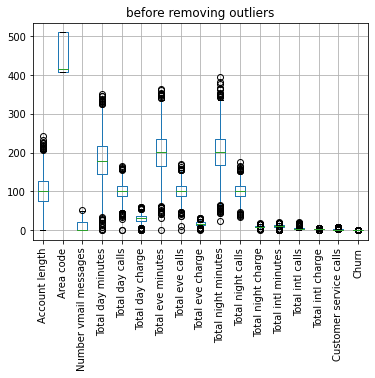

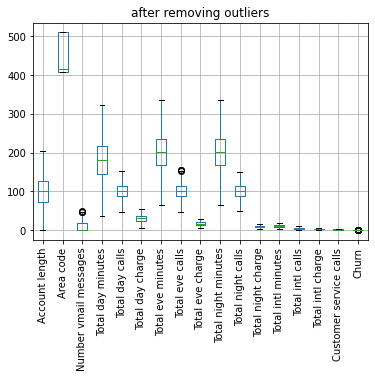

In [159]:
telecom=remove_outliers(telecom)

####**Feature Engineering:**

###Removing multicollinearity:
from the heat map we note that some features are highly correlated so we can replace them with one feature.

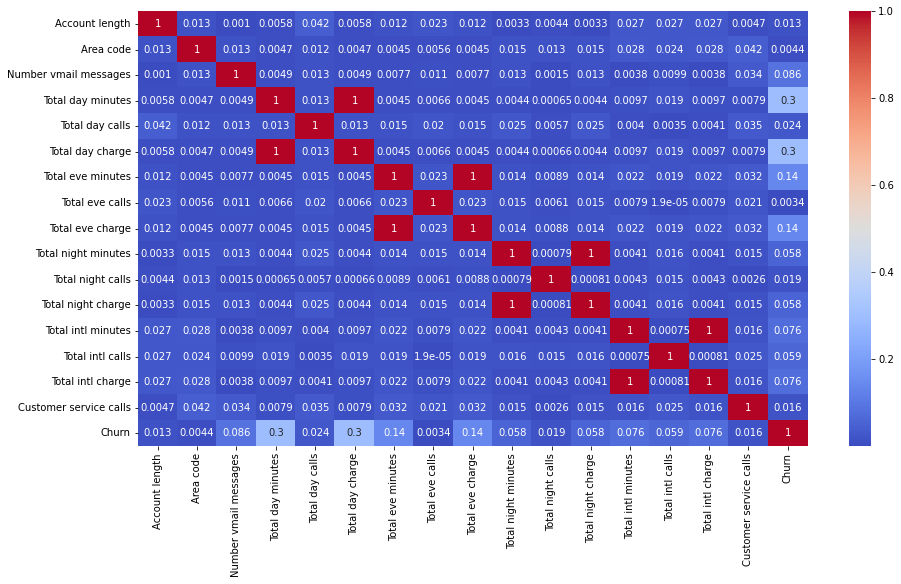

In [160]:
plt.figure(figsize=(15,8))
correlation = telecom.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [161]:
#for day, eve, night calls checking cost per minute:
intl=(telecom["Total intl charge"]/telecom['Total intl minutes']).agg(['mean'])
day=(telecom["Total day charge"]/telecom['Total day minutes']).agg(['mean'])
eve=(telecom["Total eve charge"]/telecom['Total eve minutes']).agg(['mean'])
night=(telecom["Total night charge"]/telecom['Total night minutes']).agg(['mean'])
print(f"for international calls:\n{intl}\n\n")
print(f"for day calls:\n{day}\n\n")
print(f"for evening calls:\n{eve}\n\n")
print(f"for night calls:\n{night}\n\n")

#we found that the cost per minute for each type of call is different so we have to treat them separately

for international calls:
mean    0.270058
dtype: float64


for day calls:
mean    0.170003
dtype: float64


for evening calls:
mean    0.085001
dtype: float64


for night calls:
mean    0.045
dtype: float64




In [162]:
#from above heat map we noticed a collinearity of one with minutes we talked and the charges so we remove these columns by cost/minute
telecom["intl cost per min"]=telecom["Total intl charge"]/telecom['Total intl minutes']
telecom["day cost per min"]=telecom["Total day charge"]/telecom['Total day minutes']
telecom["eve cost per min"]=telecom["Total eve charge"]/telecom['Total eve minutes']
telecom["night cost per min"]=telecom["Total night charge"]/telecom['Total night minutes']

#droping extra columns
telecom.drop(["Total intl charge","Total day charge","Total eve charge","Total night charge",
                   'Total intl minutes','Total day minutes','Total eve minutes','Total night minutes'],axis=1,inplace=True)

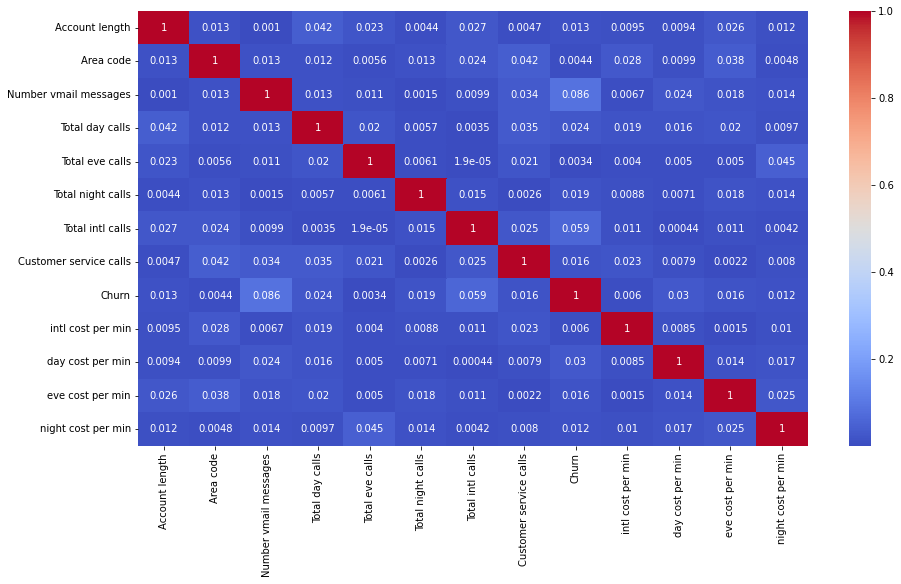

In [163]:
plt.figure(figsize=(15,8))
correlation = telecom.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
#multicollinearity is now removed

**Conclusion:** from the heat map we note that-
- multicollinearity has now been removed from the data.
- Also we note that no feature shows a good correlation with churn attribute, so chances of a customer to be churn is not very certain but there must be some common trends which we can identify, and for which we have to do the required analysis and visualizaiton

##Exploratory data analysis

In [164]:
categorical_features = telecom.describe(include=['object','boolean']).columns
categorical_features

Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')

In [165]:
for i in telecom.columns:
  if i in categorical_features:
    print("\n",i,"\n",telecom[i].value_counts())


 State 
 WV    90
MN    76
WI    68
AL    67
OH    65
NY    65
CT    64
VA    63
OR    63
UT    62
NJ    61
NC    60
KS    60
TX    60
WA    59
MT    59
MS    59
VT    58
ID    58
MI    58
MA    58
MD    57
NV    57
WY    57
IN    57
RI    56
ND    55
AZ    53
SD    53
FL    53
KY    52
MO    52
NE    52
DE    51
CO    51
IL    51
ME    51
NM    50
OK    49
TN    48
DC    48
AK    46
SC    45
GA    44
HI    44
NH    44
AR    43
LA    42
PA    38
IA    36
CA    25
Name: State, dtype: int64

 International plan 
 No     2527
Yes     266
Name: International plan, dtype: int64

 Voice mail plan 
 No     2018
Yes     775
Name: Voice mail plan, dtype: int64

 Churn 
 False    2489
True      304
Name: Churn, dtype: int64


here we note that data is highly biased, and there are very less number of customers who are churn.

#Visualization

In [166]:
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.01 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)

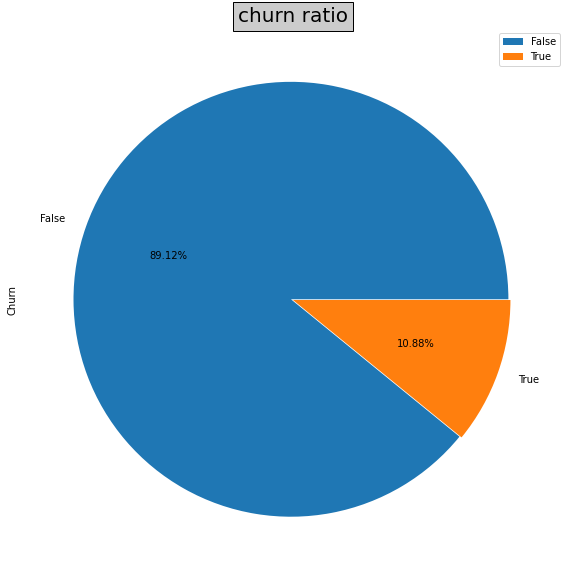

In [167]:
#ratio of users who churn
make_pieplot(telecom["Churn"],"Churn","churn ratio")

In [168]:
state_churn=pd.crosstab(telecom["State"],telecom["Churn"])
state_churn

Churn  False  True
State             
AK        45     1
AL        63     4
AR        40     3
AZ        50     3
CA        19     6
CO        46     5
CT        55     9
DC        44     4
DE        47     4
FL        49     4
GA        39     5
HI        42     2
IA        35     1
ID        53     5
IL        47     4
IN        54     3
KS        49    11
KY        47     5
LA        40     2
MA        48    10
MD        45    12
ME        44     7
MI        50     8
MN        65    11
MO        48     4
MS        51     8
MT        51     8
NC        51     9
ND        50     5
NE        47     5
NH        39     5
NJ        47    14
NM        46     4
NV        47    10
NY        58     7
OH        58     7
OK        44     5
OR        58     5
PA        33     5
RI        52     4
SC        37     8
SD        48     5
TN        45     3
TX        47    13
UT        56     6
VA        59     4
VT        53     5
WA        49    10
WI        64     4
WV        85     5
WY        50     7

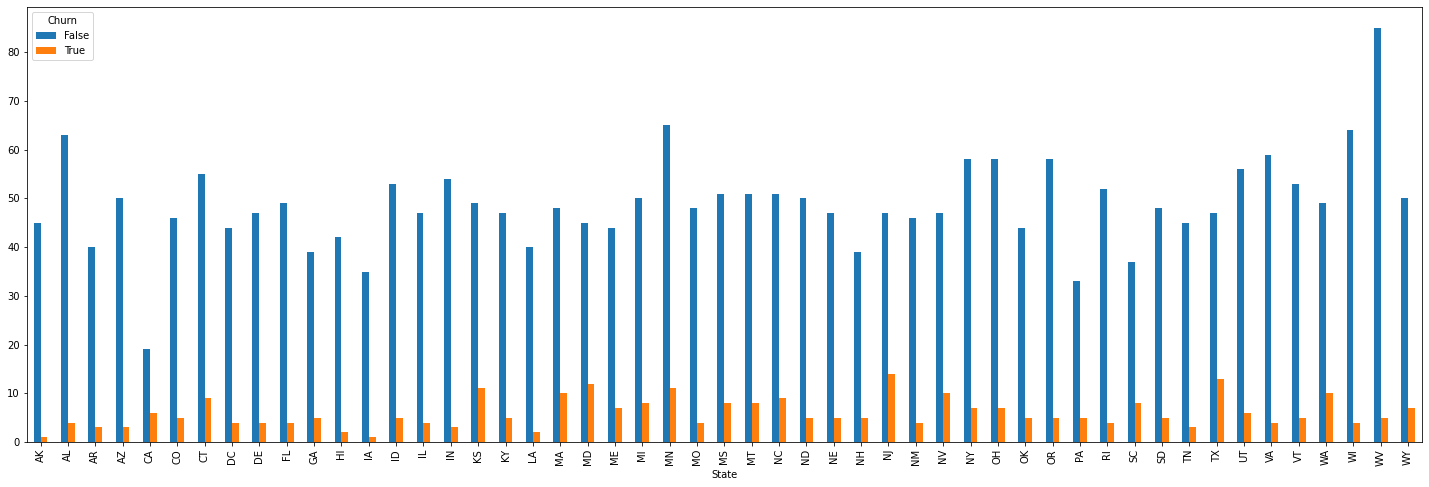

In [169]:
state_churn.plot(kind = 'bar', figsize=(25,8))

**Inference:** this plot shows which state have more number of churn customers and in which state we have more customers that are not churn, but we must want to know what percentage of customers in each state are churn and what is the probalility that if a customer belongs to a particular state that what is the probability that he/she is a churn

In [170]:
len(telecom["State"].unique())

51

In [171]:
# to judge what percentage of customers in a particulate are churn
state_churn_percentage=state_churn.copy()
total = state_churn[0]+state_churn[1]
state_churn_percentage[0] = round((state_churn[0]/total)*100,2)
state_churn_percentage[1] = round((state_churn[1]/total)*100,2)
state_churn_percentage.sort_values(by=True,inplace=True)
state_churn_percentage["state_number"]=[i for i in range(0, len(telecom["State"].unique()))]
state_positions=state_churn_percentage[["state_number"]]

In [172]:
telecom=telecom.merge(state_positions,on="State")

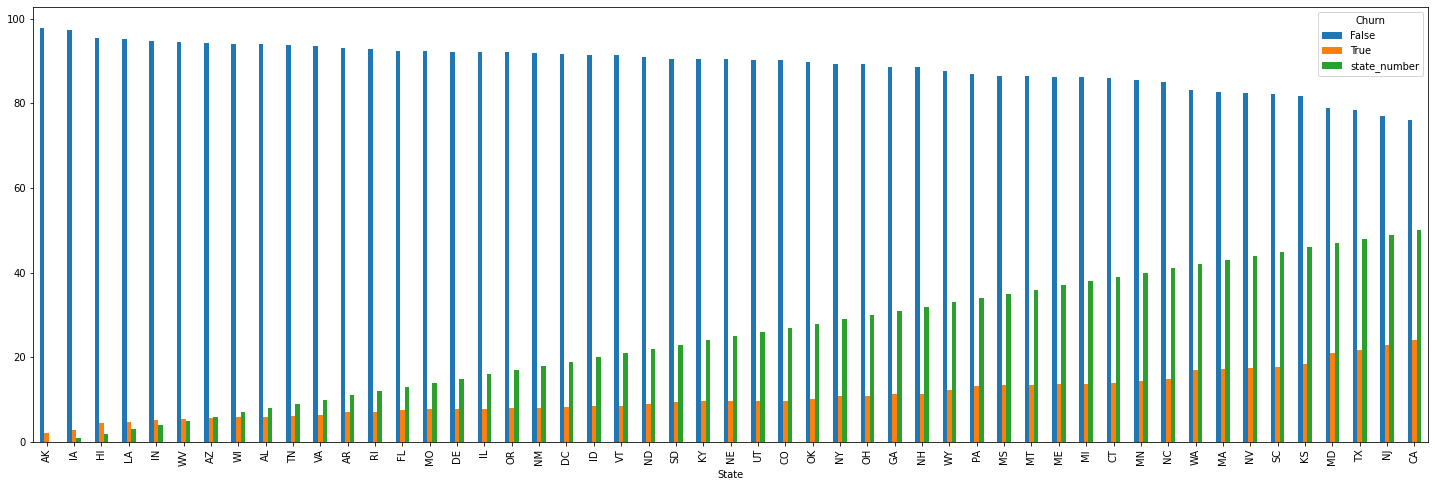

In [173]:

state_churn_percentage.plot(kind = 'bar', figsize=(25,8))

In [174]:
#states in which the chances of a customer to churn is more that 20% are:

(state_churn_percentage[True])[(state_churn_percentage[True]>=20 ).values]

#so in these 4 states the probability for a customer to be churn is comparitively higher 

State
MD    21.05
TX    21.67
NJ    22.95
CA    24.00
Name: True, dtype: float64

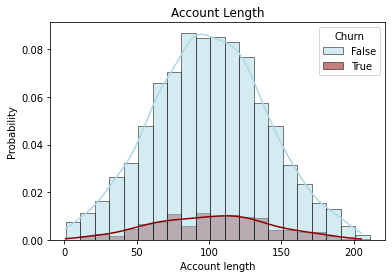

In [175]:
#what are the chances of a customer to be churn if he/she is a part of telecom from long time:
sns.histplot(data=telecom,x="Account length",stat="probability",binwidth=10,kde=True,linewidth=0.5,hue="Churn",palette=['lightblue','darkred'])
plt.title("Account length".title())
plt.show()

**Inference:** From above we note that there is a very low probability that a customer churn is beggining but between 50-150 days there is comparitively probability that a customer will churn but if account is more than 150 days that the probability reduces comparitively.

Here we also note that account length follows a normal distribution, also

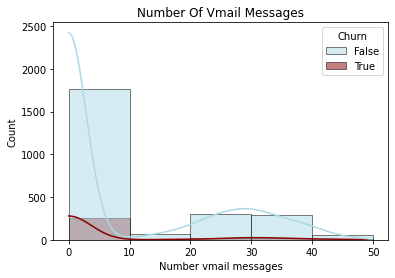

In [176]:
sns.histplot(data=telecom,x="Number vmail messages",stat="count",binwidth=10,kde=True,linewidth=0.5,hue="Churn",palette=['lightblue','darkred'])
plt.title("Number of vmail messages".title())
plt.show()

In [177]:
minimum,maximum,mean_val,std_val=telecom["Account length"].agg(['min',max,'mean','std'])
print("\nminimum= ",minimum,"\nmaximum= ",maximum,"\nmean= ",mean_val,"\nstandard deviation= ",std_val)


minimum=  1.0 
maximum=  205.0 
mean=  100.37450769781597 
standard deviation=  39.34488724347849


In [178]:
from scipy.stats import norm
# norm(1,205)
z1_left= (mean_val)- (std_val)
z1_right= (mean_val)+( std_val)
z1_left,z1_right

(61.02962045433748, 139.71939494129447)

In [179]:
#lets make a separate copy for the data where account length is between 50-150
bool_arr=((telecom["Account length"]>=z1_left) & (telecom["Account length"]<=z1_right)).values
telecom_account_length=telecom.loc[bool_arr].copy()
telecom_account_length.shape

(1885, 17)

In [180]:
def plot_bar(df,f1,distribution,per_not_churns):
  uq=len(df[f1].unique())
  distribution_graph = distribution.plot(kind = 'bar', figsize =(10,6))
  plt.title(f'{f1} v/s churn',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10,loc="right")
  i = 0
  for p in distribution_graph.patches[0:uq]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.03,str(per_not_churns.values[i])+'%',ha='center',weight='bold')
    i+=1
  plt.show()


def plot_bar_compare(df,f1,f2):
  import pandas as pd
  distribution=pd.crosstab(df[f1],df[f2])
  distribution_percentage=distribution.copy()
  total = distribution[0]+distribution[1]
  distribution_percentage[0] = round((distribution[0]/total)*100,2)
  distribution_percentage[1] = round((distribution[1]/total)*100,2)
  per_not_churns=distribution_percentage[False]
  #print(per_not_churns)

  plot_bar(df,f1,distribution,per_not_churns)


In [181]:
telecom["Number vmail messages"].value_counts()

0     2018
29      49
31      48
30      41
28      41
26      37
24      36
27      35
33      35
32      35
25      34
36      28
23      28
39      27
35      27
37      26
22      25
34      23
38      22
21      19
19      17
20      17
40      14
16      12
42      12
17      11
41      11
15       8
43       8
18       7
44       7
14       6
12       6
45       5
13       4
48       2
46       2
11       2
9        2
47       2
10       1
4        1
49       1
8        1
Name: Number vmail messages, dtype: int64

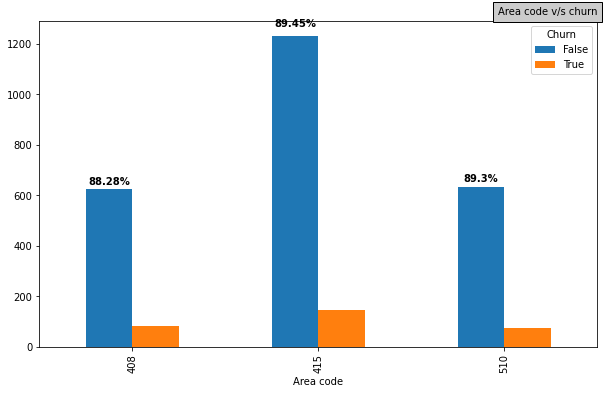

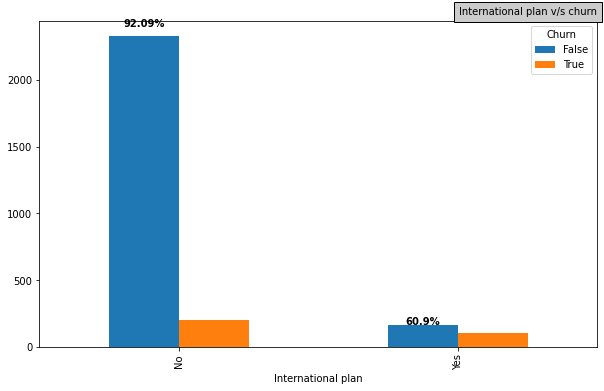

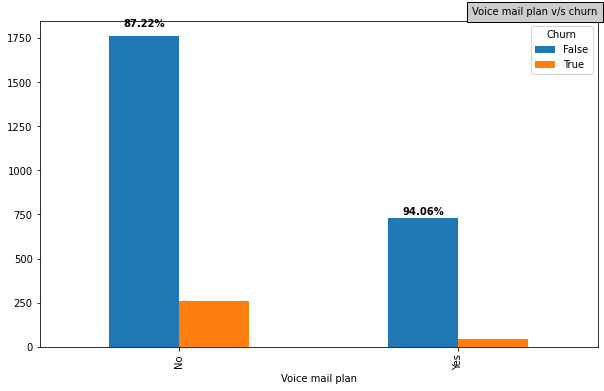

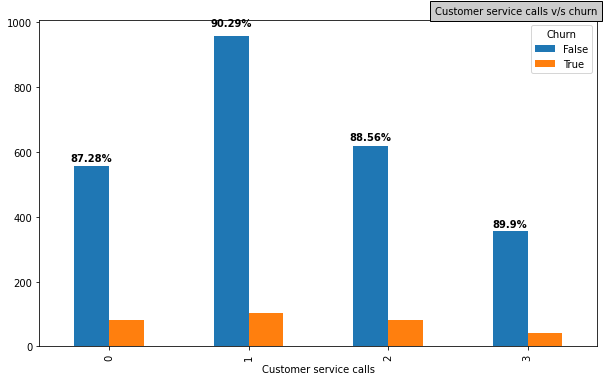

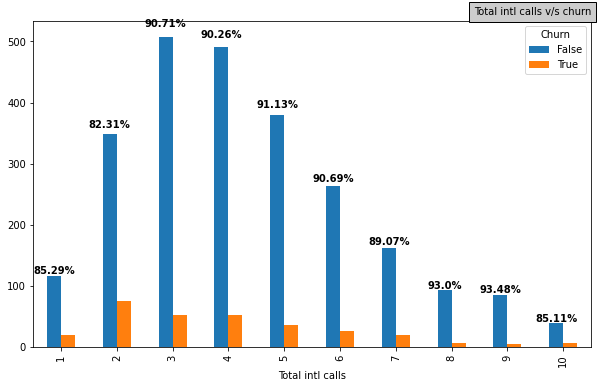

In [34]:
categorical_attributes=['Area code', 'International plan','Voice mail plan','Customer service calls',"Total intl calls"]
for i in categorical_attributes:
  plot_bar_compare(telecom,i,"Churn")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44c77a9f90>,
      dtype=object)

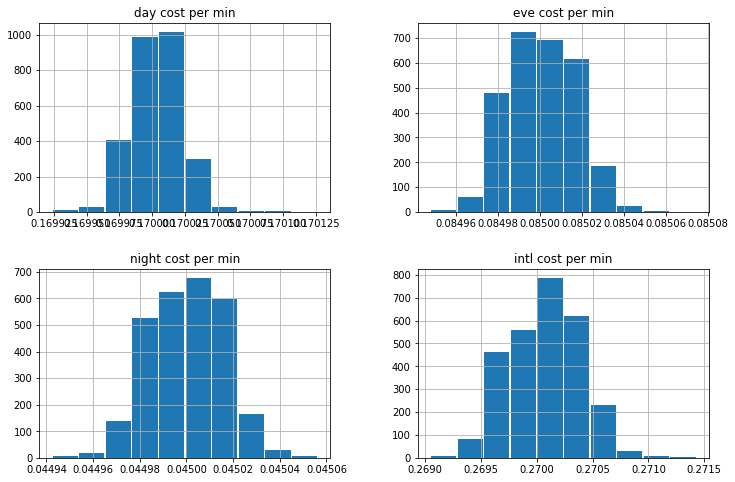

In [ ]:
features = ['day cost per min','eve cost per min', 'night cost per min', 'intl cost per min' ]
telecom[features].hist(figsize=(12,8), rwidth=0.95)


#cost per min of calls nearly follows a normal distributuion

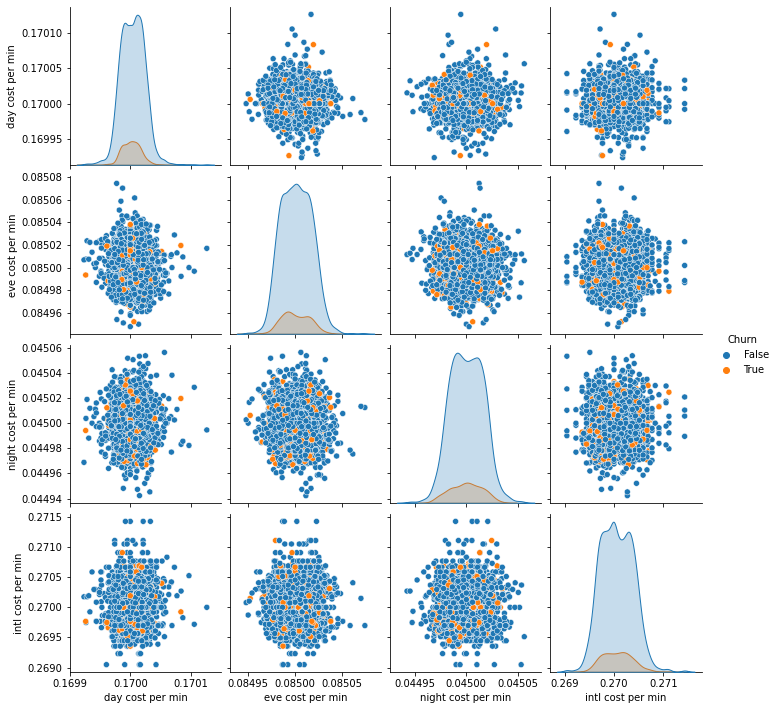

In [ ]:
features = ['day cost per min','eve cost per min', 'night cost per min', 'intl cost per min' ,'Churn']
sns.pairplot(telecom[features],hue='Churn')

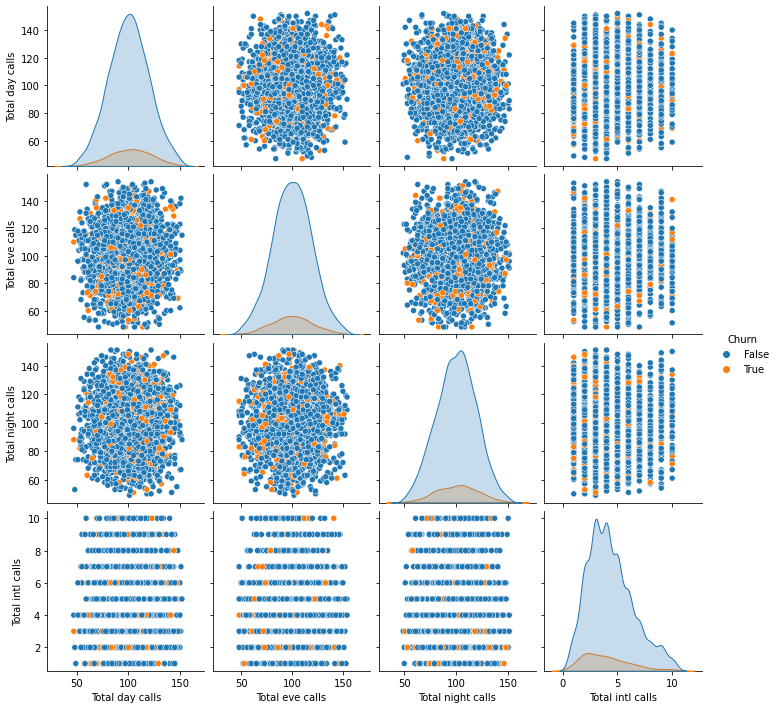

In [ ]:
#now checking dependency of churn on call rate
features = ['Total day calls','Total eve calls', 'Total night calls', 'Total intl calls' ,'Churn']
sns.pairplot(telecom[features],hue='Churn')

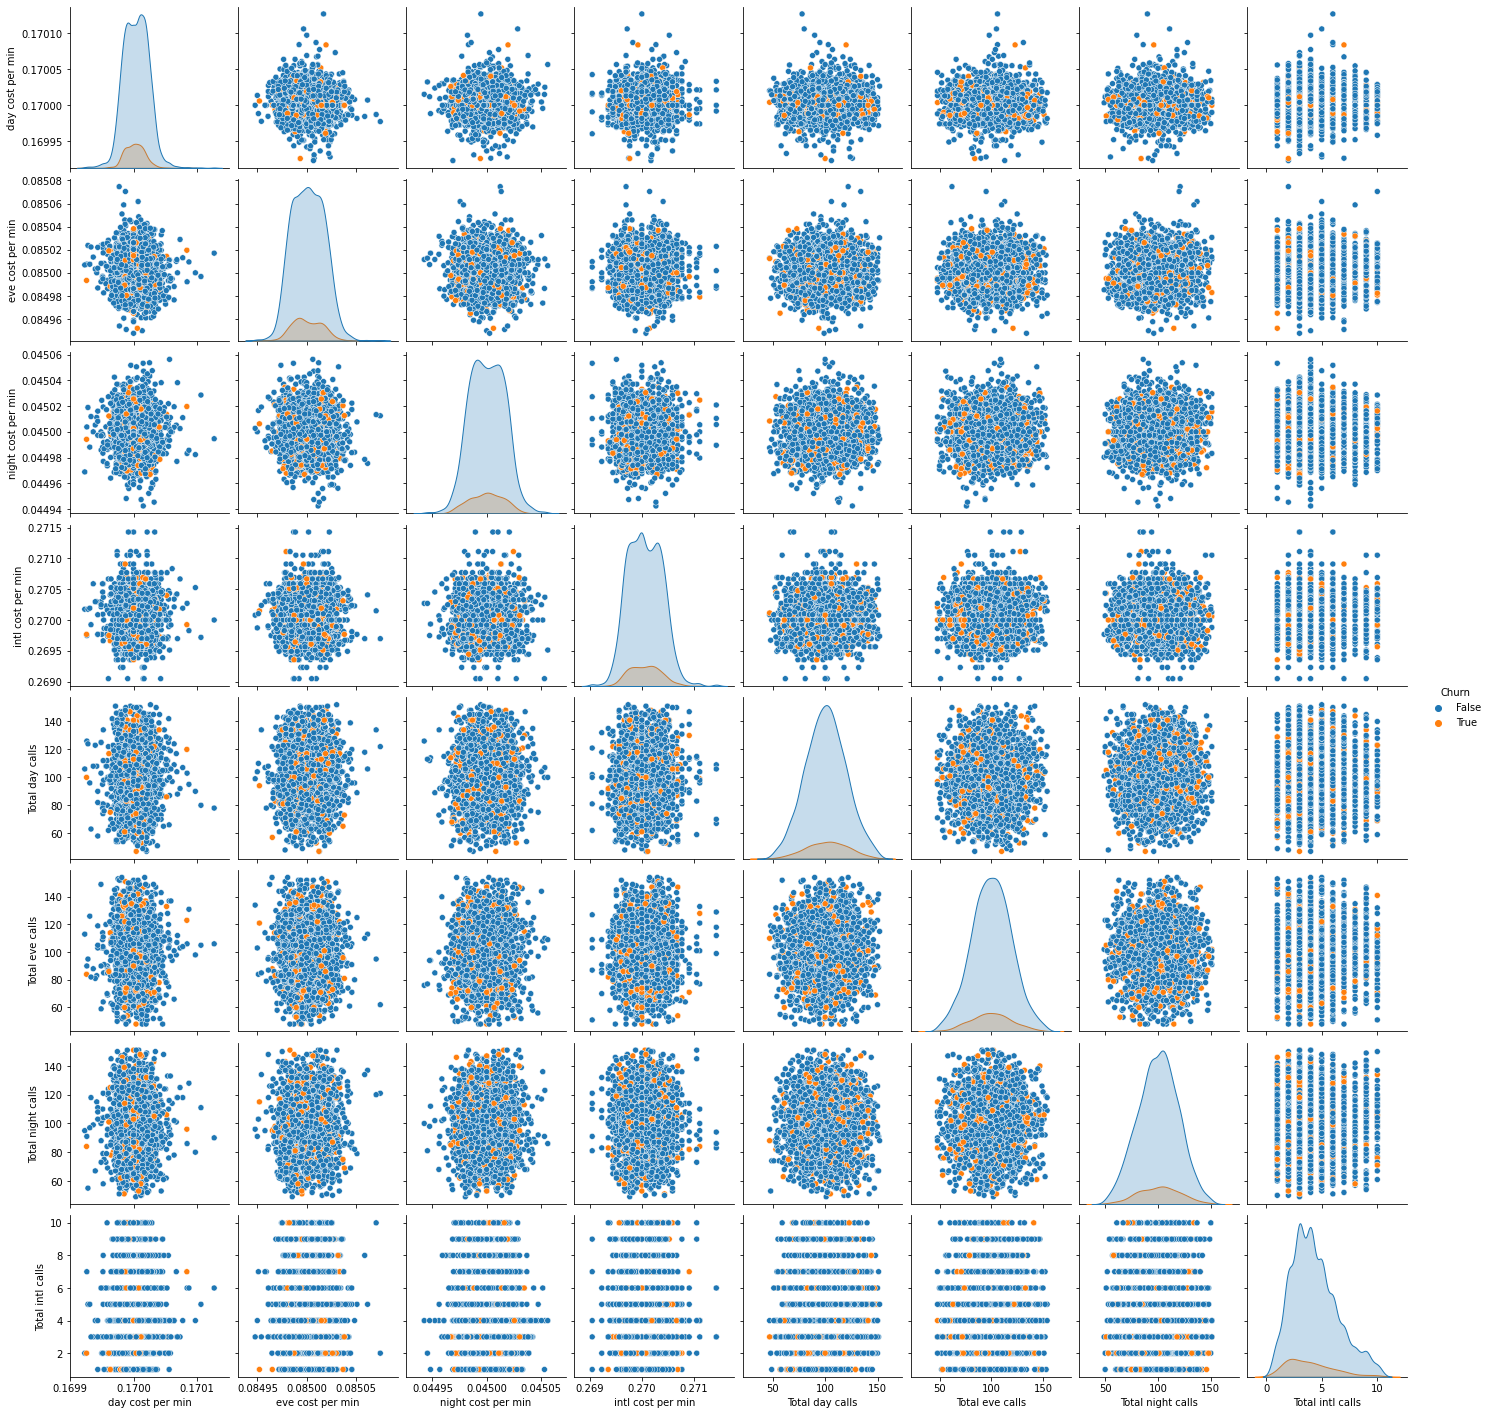

In [ ]:
features = ['day cost per min','eve cost per min', 'night cost per min', 'intl cost per min' ,'Total day calls',
       'Total eve calls', 'Total night calls', 'Total intl calls','Churn']
sns.pairplot(telecom[features],hue='Churn')

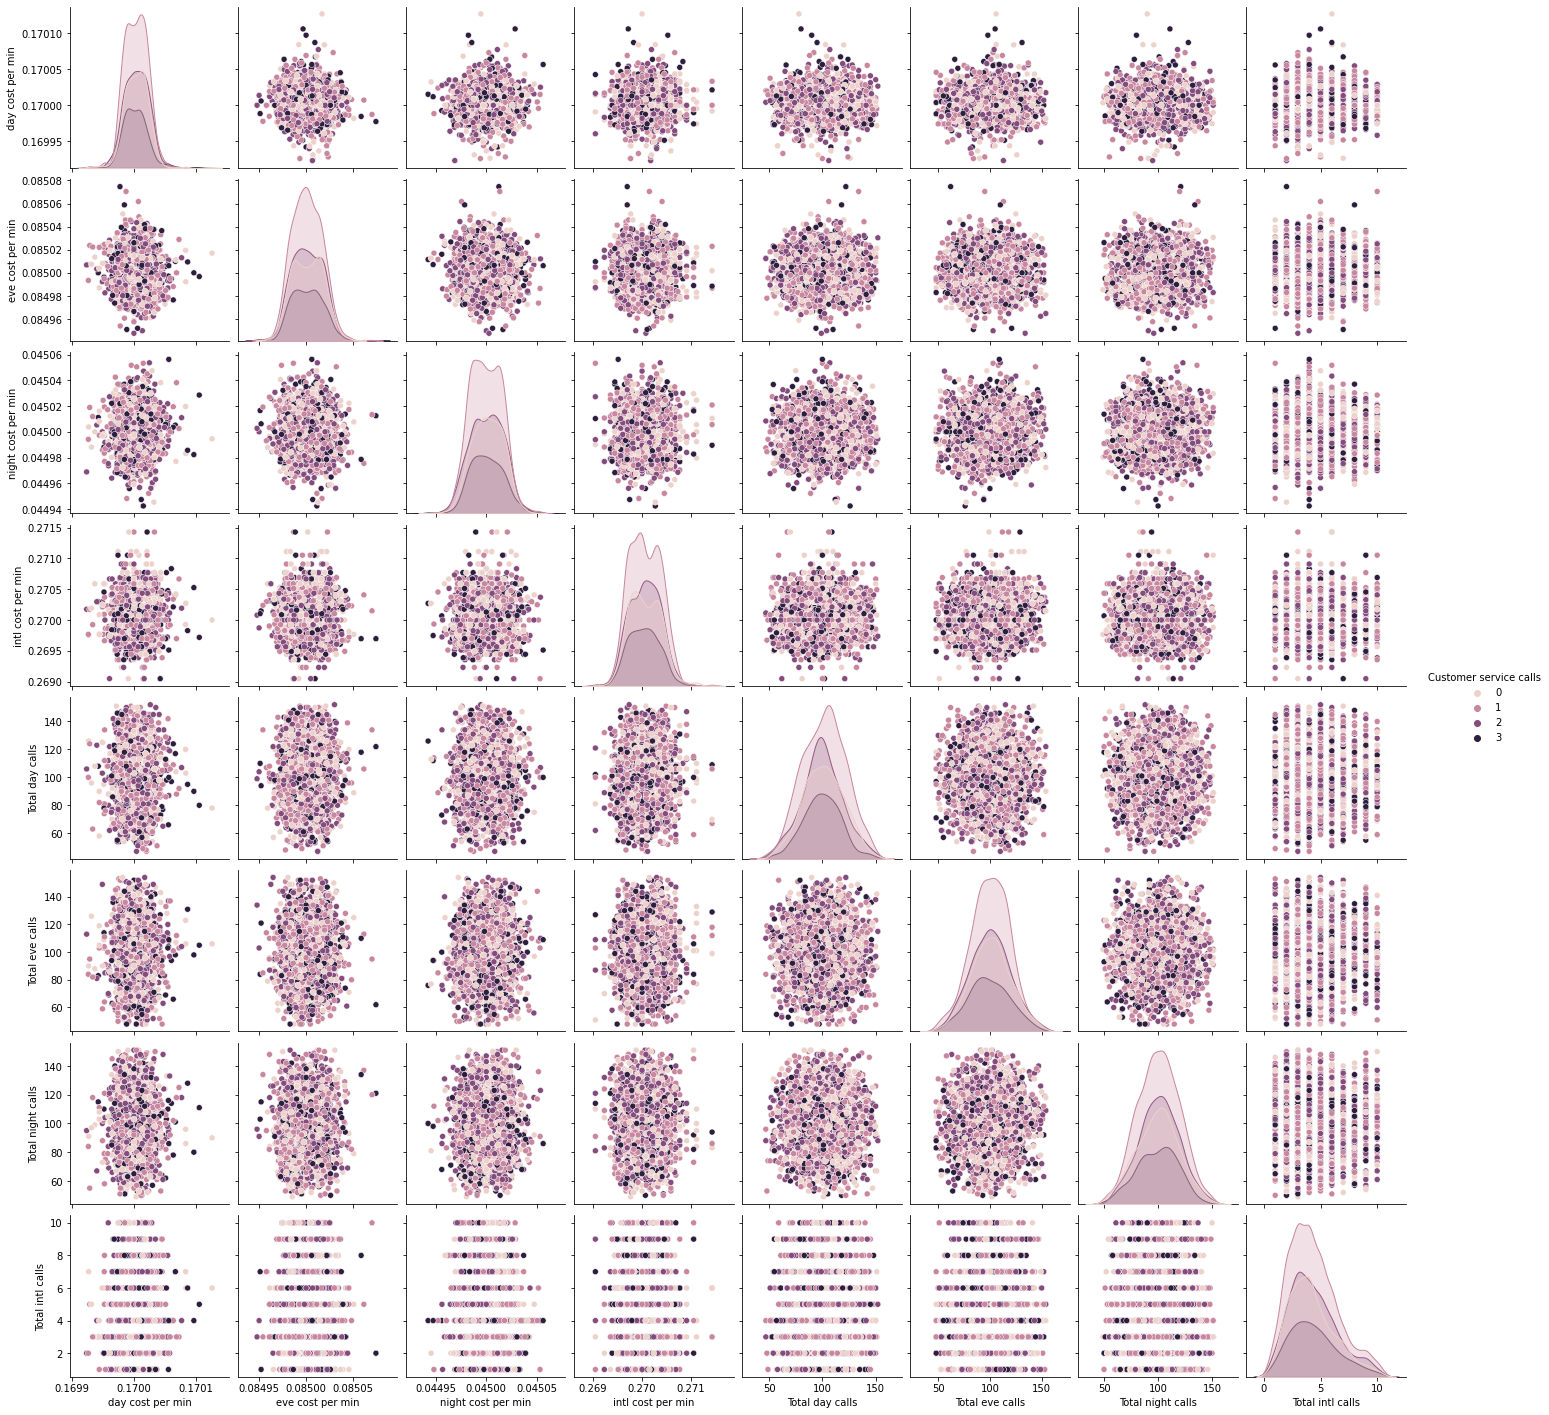

In [ ]:
#customer service calls relaton with other types of calls
features = ['day cost per min','eve cost per min', 'night cost per min', 'intl cost per min' ,'Total day calls',
       'Total eve calls', 'Total night calls', 'Total intl calls','Customer service calls']
sns.pairplot(telecom[features],hue='Customer service calls')

##Supervised machine learning: Classification model

##Logistic Regression

In [183]:
#no: 0, yes: 1
telecom["class"]=[1 if i else 0 for i in telecom["Churn"]]
telecom["International plan"]=[1 if i=='Yes' else 0 for i in telecom["International plan"]]
telecom['Voice mail plan']=[1 if i=='Yes' else 0 for i in telecom["Voice mail plan"]]

In [185]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [244]:
def model_checking(original,predicted,labels=["possibility1","possibility2"]):
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
  model_accuracy=accuracy_score(predicted,original)
  print("The accuracy of model is= ", model_accuracy,"\n")
  rocauc_score=roc_auc_score(original,predicted)
  print("The roc_auc score of model is= ", rocauc_score,"\n")
  print("Confusion matrix: \n")
  cm=confusion_matrix(original,predicted)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [188]:
#in churn false: 0, true: 1
x=telecom[['Account length',"Number vmail messages","International plan"]].copy()
y=telecom["class"].copy()

In [189]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [190]:
y_train.value_counts(),y_test.value_counts()

(0    1991
 1     243
 Name: class, dtype: int64, 0    498
 1     61
 Name: class, dtype: int64)

In [191]:
#fitting logistic regression on trained data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True, max_iter=10000)
model.fit(x_train,y_train)


LogisticRegression(max_iter=10000)

In [192]:
#evaluation
train_predict=model.predict_proba(x_train)
test_predict=model.predict_proba(x_test)

In [193]:
test_predict

array([[0.89369723, 0.10630277],
       [0.92064708, 0.07935292],
       [0.90629357, 0.09370643],
       ...,
       [0.8995981 , 0.1004019 ],
       [0.91670512, 0.08329488],
       [0.91156441, 0.08843559]])

In [194]:
train_predict=model.predict_proba(x_train)[:,1]
test_predict=model.predict_proba(x_test)[:,1]

In [195]:
train_class_predict=model.predict(x_train)
test_class_predict=model.predict(x_test)

The accuracy of model is=  0.8912264995523724 

The roc_auc score of model is=  0.5 

Confusion matrix: 

[[1991    0]
 [ 243    0]]


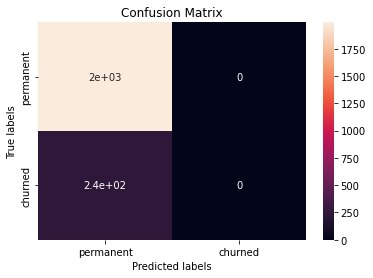

In [322]:
model_checking(y_train, train_class_predict,labels=["permanent","churned"])

In [85]:
telecom["Churn"].value_counts()

False    2489
True      304
Name: Churn, dtype: int64

In [86]:
30400/2489
""" 
this means only 12.214% of the total values are churn, now what if our model don't identity these value and shows 89% accuracy, 
in this case the model shows more accuracy but model is not good and will not be able to make correct predictions,
so we have to check model on some other scale as well, so for this we will se confusion matrix.
"""

" \nthis means only 12.214% of the total values are churn, now what if our model don't identity these value and shows 89% accuracy, \nin this case the model shows more accuracy but model is not good and will not be able to make correct predictions,\nso we have to check model on some other scale as well, so for this we will se confusion matrix.\n"

####Confusion matrix

##Decesion Tree:
as the y attribute do not have any linear relation also logistic regression is not working so we will use decesion tree now to predict whether a customer is churn or not....

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [198]:
#independent and dependent variable
independent_var=['Account length','International plan','Voice mail plan', 'Number vmail messages','Customer service calls']
dependent_var=["class"]

In [199]:
x=telecom[independent_var]
y=telecom[dependent_var]

In [200]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.30, random_state=324)

In [201]:
#fitting on train data
model2=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,max_depth=10,random_state=0)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       random_state=0)

In [202]:
y_test_predicted=model2.predict(x_test)
y_train_predicted=model2.predict(x_train)

In [203]:
pd.Series(y_test_predicted).value_counts()

0    829
1      9
dtype: int64

####Acurracy of the model

The accuracy of model is=  0.9012787723785166 

The roc_auc score of model is=  0.9012787723785166 

Confusion matrix: 

[[1739    6]
 [ 187   23]]


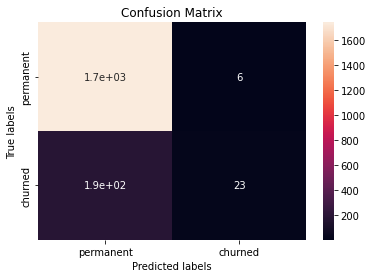

In [204]:
model_checking(y_train, y_train_predicted,labels=["permanent","churned"])

In [96]:
#stratified sampling
churn_data=telecom.loc[telecom["class"]==1]
not_churn_data=telecom.loc[telecom["class"]==0]
churn_data.shape

(304, 19)

In [205]:
#help(telecom.sample)
churn_data=churn_data.sample(ignore_index=True,frac=1,random_state=1,replace=True)
not_churn_data=not_churn_data.sample(ignore_index=True,frac=1,random_state=1,replace=True)

In [206]:
churn_data.shape,not_churn_data.shape,telecom.shape

((304, 19), (2489, 19), (2793, 18))

In [207]:
(2489*80)/100

1991.2

In [210]:
training=(churn_data.iloc[:250].append(not_churn_data.iloc[:1991],ignore_index=True)).sample(ignore_index=True,frac=1,random_state=1,replace=True)
testing=(churn_data.iloc[250:].append(not_churn_data.iloc[1991:],ignore_index=True)).sample(ignore_index=True,frac=1,random_state=1,replace=True)

In [212]:
#uptill  now we do not get satisfactory results
#as the data is highly biased so lets try doing startified sampling
independent_var=['Account length','International plan','Voice mail plan', 'Number vmail messages','Customer service calls']
dependent_var=["class"]
x_train=training[independent_var]
x_test=testing[independent_var]
y_train=training[dependent_var]
y_test=testing[dependent_var]

In [213]:
#fitting on train data
model3=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,max_depth=10,random_state=0)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       random_state=0)

In [214]:
y_test_predicted=model3.predict(x_test)
y_train_predicted=model3.predict(x_train)

In [215]:
pd.Series(y_test_predicted).value_counts()

0    548
1      4
dtype: int64

The accuracy of model is=  0.895136099955377 

The roc_auc score of model is=  0.895136099955377 

Confusion matrix: 

[[1980    8]
 [ 227   26]]


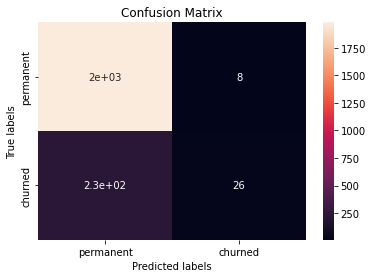

In [216]:
model_checking(y_train, y_train_predicted,labels=["permanent","churned"])

In [217]:
#after doing stratified sampling results gets improved but, not satisfactory, so now let's try random forest and gradient boosting.
"""
also we note from our analysis that the chances of a customer to be churn is not  very certain, for same conditions customer can be both churn and 
not churn, so the above mmodel guess the person to be churn when there is a high probability, so above model is quite acceptable
but let's try to make a better one
"""

"\nalso we note from our analysis that the chances of a customer to be churn is not  very certain, for same conditions customer can be both churn and \nnot churn, so the above mmodel guess the person to be churn when there is a high probability, so above model is quite acceptable\nbut let's try to make a better one\n"

In [252]:
corr_class=abs((telecom.corr())["class"]).sort_values(ascending=False)
#now we take top 10 attributes for building model
independent_var=(corr_class.index)[2:]

In [234]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [254]:
x=telecom[independent_var]
y=telecom["class"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)

In [255]:
model4=RandomForestClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
model4 = GridSearchCV(model4, param_grid = grid_values, scoring = 'roc_auc', cv=5)

model4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [290]:
y_train_predicted=model4.predict(x_train)
y_test_predicted=model4.predict(x_test)

The accuracy of model is=  0.9064458370635631 

The roc_auc score of model is=  0.5699588477366255 

Confusion matrix: 

[[1991    0]
 [ 209   34]]


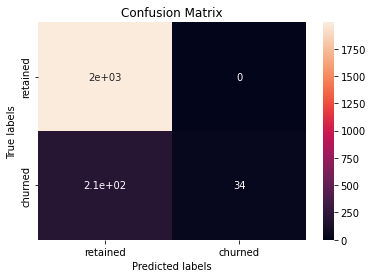

In [257]:
model_checking(y_train,y_train_predicted,["retained","churned"])

In [262]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
model5 = GridSearchCV(model5, param_grid = grid_values, scoring = 'roc_auc', cv=5)

model5.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [301]:
def predict_value(p1,val1,val2,probability):
  predicted=[]
  for i in probability:
    if i[0] <=p1:
      predicted.append(val2)
    else:
      predicted.append(val1)
  
  return predicted

  

In [319]:
y_train_predicted_proba=model5.predict_proba(x_train)
y_train_predicted=predict_value(0.65,0,1,y_train_predicted_proba)

y_test_predicted_proba=model5.predict_proba(x_test)
y_test_predicted=predict_value(0.65,0,1,y_test_predicted_proba)

The accuracy of model is=  0.9265890778871978 

The roc_auc score of model is=  0.6806162711626187 

Confusion matrix: 

[[1981   10]
 [ 154   89]]


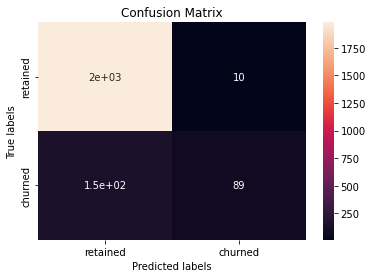

In [320]:
model_checking(y_train,y_train_predicted,["retained","churned"])

The accuracy of model is=  0.9016100178890877 

The roc_auc score of model is=  0.5995292645993812 

Confusion matrix: 

[[491   7]
 [ 48  13]]


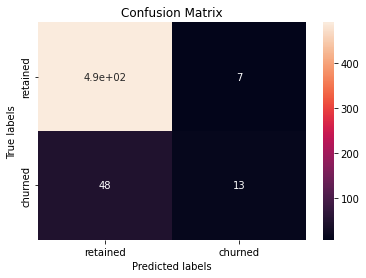

In [321]:
model_checking(y_test,y_test_predicted,["retained","churned"])